<a href="https://www.kaggle.com/code/sudansuwal/heart-disease-classification?scriptVersionId=174050480" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import 
import pandas as pd
import torch

In [83]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')

X = df.drop(columns=['target']).values
y = df['target'].values



In [239]:
import numpy as np
np.array(X[2])
print(y[2])

0


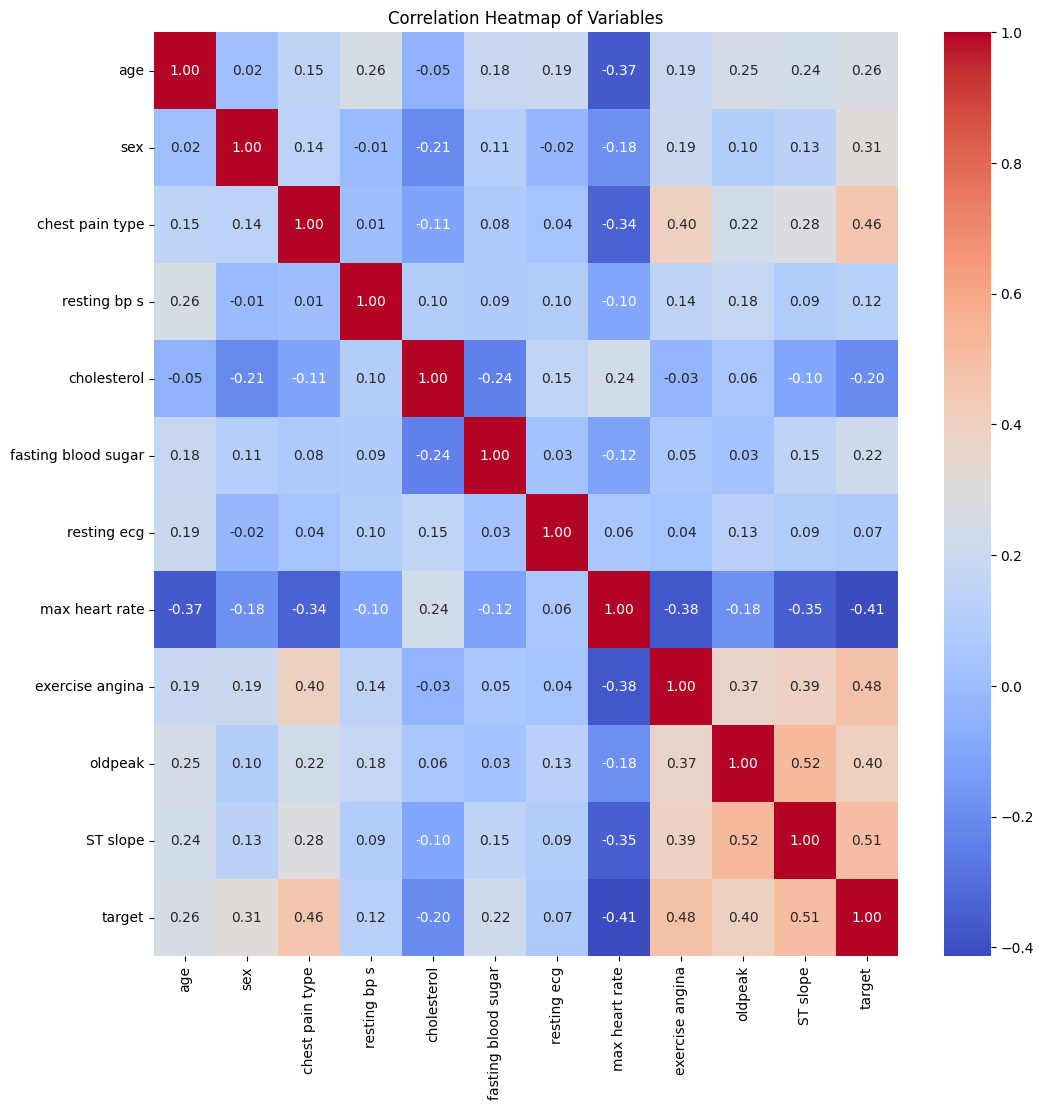

In [188]:
import seaborn as sns

# Step 2: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

In [189]:
# Preprocess

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)


train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
from torch.utils.data import Dataset


class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


In [191]:
train_datasets = CustomDataset(train_X, train_y)
test_datasets = CustomDataset(test_X, test_y)

In [192]:
# Build the model
import torch.nn as nn

class ClassifierModel(nn.Module):
    def __init__(self, input_size):
        super(ClassifierModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


In [170]:
print(X.shape[-1])

11


In [258]:
import torch.optim as optim
# init model
model = ClassifierModel(X.shape[-1])
# init loss fn
criterion = nn.BCELoss()
# optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [256]:
device = torch.device('cpu')
model = model.to(device)

In [259]:
from torch.utils.data import DataLoader
# training loop

num_epochs = 120
batch_size = 32

train_loader = DataLoader(train_datasets, batch_size, shuffle=True)


model.train()


for epoch in range(num_epochs):
    running_loss = 0.
    last_loss = 0.
    for features, labels in train_loader:
     
        # calculate
        outputs = model(features).squeeze()
        # calculate loss
        loss = criterion(outputs, labels)
         
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()
        
        running_loss += loss.item() * len(train_loader)
    
    epoch_loss = running_loss / len(train_datasets)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
        


Epoch [1/120], Loss: 14.7896
Epoch [2/120], Loss: 5.0933
Epoch [3/120], Loss: 1.9500
Epoch [4/120], Loss: 0.8903
Epoch [5/120], Loss: 0.7196
Epoch [6/120], Loss: 0.6280
Epoch [7/120], Loss: 0.5815
Epoch [8/120], Loss: 0.5501
Epoch [9/120], Loss: 0.5260
Epoch [10/120], Loss: 0.5112
Epoch [11/120], Loss: 0.5015
Epoch [12/120], Loss: 0.4866
Epoch [13/120], Loss: 0.4978
Epoch [14/120], Loss: 0.4707
Epoch [15/120], Loss: 0.4685
Epoch [16/120], Loss: 0.4635
Epoch [17/120], Loss: 0.4595
Epoch [18/120], Loss: 0.4592
Epoch [19/120], Loss: 0.4527
Epoch [20/120], Loss: 0.4599
Epoch [21/120], Loss: 0.4526
Epoch [22/120], Loss: 0.4456
Epoch [23/120], Loss: 0.4386
Epoch [24/120], Loss: 0.4316
Epoch [25/120], Loss: 0.4337
Epoch [26/120], Loss: 0.4306
Epoch [27/120], Loss: 0.4565
Epoch [28/120], Loss: 0.4557
Epoch [29/120], Loss: 0.4312
Epoch [30/120], Loss: 0.4279
Epoch [31/120], Loss: 0.4204
Epoch [32/120], Loss: 0.4303
Epoch [33/120], Loss: 0.4277
Epoch [34/120], Loss: 0.4349
Epoch [35/120], Loss: 

In [260]:
# Evaluation
model.eval()
test_loader = DataLoader(test_datasets, batch_size=batch_size, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs.squeeze() >= 0.5).long()  # Convert probabilities to binary predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.8319


In [263]:
p = model(torch.tensor([ 37.,   1.,   2., 130., 283.,   0.,   1.,  98.,   0.,   0.,   1.]))
print('no risk' if p.round().long().item() == 0 else 'risk')

no risk
